## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
featofvar = 'Type and Serum'

remote_folder = 'Tissue_Studies/10_23_18_corona_tissue' #Folder in AWS S3 containing files to be analyzed
bucket = 'ccurtis.data'
vids = 10
types = ['PEG_cor', 'PEG', 'PS_cor', 'PS']
pups = ['P1', 'P2']
slices = ['S1', 'S2']

counter = 0
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                try:
                    filename = 'features_{}_{}_{}_XY{}.csv'.format(typ, pup, slic, '%02d' % num)
                    print(filename)
                    aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                    fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                    print('{} size: {}'.format(filename, fstats.shape))
                    fstats['Type and Serum'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                    if 'cor' in typ:
                        fstats['Serum'] = pd.Series(fstats.shape[0]*['serum'], index=fstats.index)
                    else:
                        fstats['Serum'] = pd.Series(fstats.shape[0]*['no serum'], index=fstats.index)
                    if 'PS' in typ:
                        fstats['Type'] = pd.Series(fstats.shape[0]*['COOH'], index=fstats.index)
                    else:
                        fstats['Type'] = pd.Series(fstats.shape[0]*['PEG'], index=fstats.index)
                    fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                    fstats['Pup Number'] = pd.Series(fstats.shape[0]*[pup], index=fstats.index)
                    fstats['Slice Number'] = pd.Series(fstats.shape[0]*[slic], index=fstats.index)
                    counter = counter + 1
                    if counter == 1:
                        fstats_tot = fstats
                    else:
                        fstats_tot = fstats_tot.append(fstats, ignore_index=True)
                except:
                    print('Skipped!: {}'.format(filename))

features_PEG_cor_P1_S1_XY01.csv
features_PEG_cor_P1_S1_XY01.csv size: (6550, 67)
features_PEG_cor_P1_S1_XY02.csv
features_PEG_cor_P1_S1_XY02.csv size: (5744, 67)
features_PEG_cor_P1_S1_XY03.csv
features_PEG_cor_P1_S1_XY03.csv size: (3721, 67)
features_PEG_cor_P1_S1_XY04.csv
features_PEG_cor_P1_S1_XY04.csv size: (5052, 67)
features_PEG_cor_P1_S1_XY05.csv
features_PEG_cor_P1_S1_XY05.csv size: (3002, 67)
features_PEG_cor_P1_S1_XY06.csv
features_PEG_cor_P1_S1_XY06.csv size: (2192, 67)
features_PEG_cor_P1_S1_XY07.csv
features_PEG_cor_P1_S1_XY07.csv size: (4272, 67)
features_PEG_cor_P1_S1_XY08.csv
features_PEG_cor_P1_S1_XY08.csv size: (4302, 67)
features_PEG_cor_P1_S1_XY09.csv
features_PEG_cor_P1_S1_XY09.csv size: (4488, 67)
features_PEG_cor_P1_S1_XY10.csv
features_PEG_cor_P1_S1_XY10.csv size: (3780, 67)
features_PEG_cor_P1_S2_XY01.csv
features_PEG_cor_P1_S2_XY01.csv size: (5288, 67)
features_PEG_cor_P1_S2_XY02.csv
features_PEG_cor_P1_S2_XY02.csv size: (11818, 67)
features_PEG_cor_P1_S2_XY03

features_PS_cor_P2_S1_XY07.csv size: (8299, 67)
features_PS_cor_P2_S1_XY08.csv
features_PS_cor_P2_S1_XY08.csv size: (10757, 67)
features_PS_cor_P2_S1_XY09.csv
features_PS_cor_P2_S1_XY09.csv size: (7796, 67)
features_PS_cor_P2_S1_XY10.csv
features_PS_cor_P2_S1_XY10.csv size: (12945, 67)
features_PS_cor_P2_S2_XY01.csv
features_PS_cor_P2_S2_XY01.csv size: (9603, 67)
features_PS_cor_P2_S2_XY02.csv
features_PS_cor_P2_S2_XY02.csv size: (9070, 67)
features_PS_cor_P2_S2_XY03.csv
features_PS_cor_P2_S2_XY03.csv size: (12207, 67)
features_PS_cor_P2_S2_XY04.csv
features_PS_cor_P2_S2_XY04.csv size: (3878, 67)
features_PS_cor_P2_S2_XY05.csv
features_PS_cor_P2_S2_XY05.csv size: (6658, 67)
features_PS_cor_P2_S2_XY06.csv
features_PS_cor_P2_S2_XY06.csv size: (18070, 67)
features_PS_cor_P2_S2_XY07.csv
features_PS_cor_P2_S2_XY07.csv size: (4277, 67)
features_PS_cor_P2_S2_XY08.csv
features_PS_cor_P2_S2_XY08.csv size: (6223, 67)
features_PS_cor_P2_S2_XY09.csv
features_PS_cor_P2_S2_XY09.csv size: (9849, 67)


In [3]:
nonnum = ['Type and Serum', 'Type', 'Serum', 'Video Number', 'Pup Number', 'Slice Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y', 'Quality',
          'Mean_Intensity', 'SN_Ratio', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean SN_Ratio',
          'Std SN_Ratio', 'binx', 'biny', 'bins', 'index']

## Train-Test Split

In [4]:
bins = list(range(0, 2048+1, 256))
fstats_tot['binx'] = pd.cut(fstats_tot.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['biny'] = pd.cut(fstats_tot.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['bins'] = 8*fstats_tot['binx'] + fstats_tot['biny']
fstats_tot = fstats_tot[np.isfinite(fstats_tot.bins)]
fstats_tot.bins = fstats_tot.bins.astype(int)

In [5]:
def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [6]:
f_train = fstats_tot[fstats_tot.bins.isin(checkerboard(8))].reset_index()
f_test = fstats_tot[~fstats_tot.bins.isin(checkerboard(8))].reset_index()

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [9]:
ncomp = 12
pca_train = pca.pca_analysis(f_train, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.26978524976071466
1 component: 0.42367653028122904
2 component: 0.5091791614406876
3 component: 0.5729981275516651
4 component: 0.6212233580566732
5 component: 0.6581203019290602
6 component: 0.6888264281861022
7 component: 0.7164136103744462
8 component: 0.7421645178919607
9 component: 0.7670899570844031
10 component: 0.7897158073381578
11 component: 0.8094325180171592


In [10]:
pca_train.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11
0,Mean Deff1,Mean asymmetry2,Std elongation,asymmetry1,trappedness,alpha,Std MSD_ratio,Std kurtosis,D_fit,Std boundedness,kurtosis,kurtosis
1,Mean efficiency,Mean asymmetry1,Std asymmetry3,asymmetry2,boundedness,D_fit,Mean MSD_ratio,Mean kurtosis,fractal_dim,Std trappedness,Deff2,Std straightness
2,Mean straightness,Mean asymmetry3,Std asymmetry2,efficiency,frames,straightness,Std kurtosis,MSD_ratio,Mean frames,Std MSD_ratio,Std MSD_ratio,alpha
3,Mean D_fit,Mean elongation,Std asymmetry1,asymmetry3,Mean trappedness,efficiency,Mean kurtosis,Std asymmetry3,Std Deff2,Mean MSD_ratio,Std kurtosis,Std D_fit
4,Std Deff1,asymmetry3,Std straightness,elongation,Mean boundedness,MSD_ratio,trappedness,Std AR,frames,frames,Deff1,Deff2


In [11]:
pca_test = pca.pca_analysis(f_test, dropcols=nonnum, n_components=ncomp, existing_model=True, model_file=pca_train)

The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [13]:
kmostat = pca.kmo(pca_train.scaled)

0.907100645507


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [14]:
import numpy as np
featofvar = 'Type and Serum'
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='PS'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='PS_cor'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='PEG_cor'].values[:, -ncomp:], axis=0)

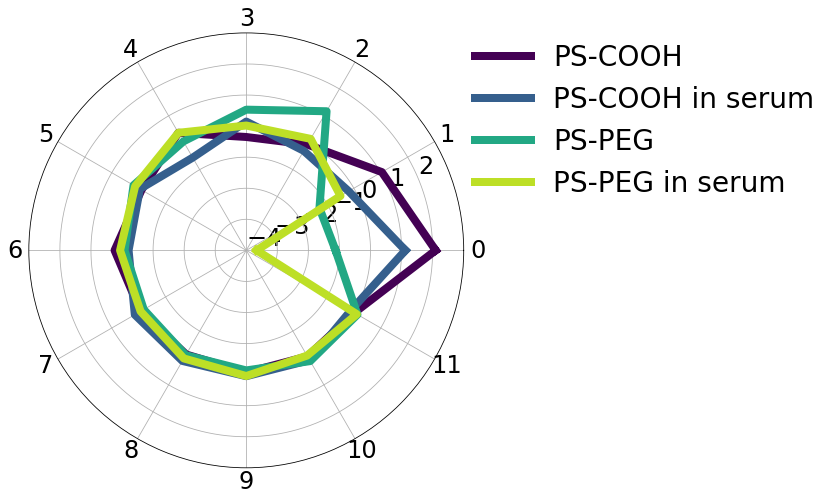

In [18]:
labels2 = ['PS-COOH', 'PS-COOH in serum', 'PS-PEG', 'PS-PEG in serum']
labels = ['PS', 'PS_cor', 'PEG', 'PEG_cor']
pca.plot_pca(dicti, savefig=True, labels=labels2, rticks=np.linspace(-4, 2, 7), dpi=1200, labelsize=24,
             filename='pics/Fig4/tissue_pcaavg.png')

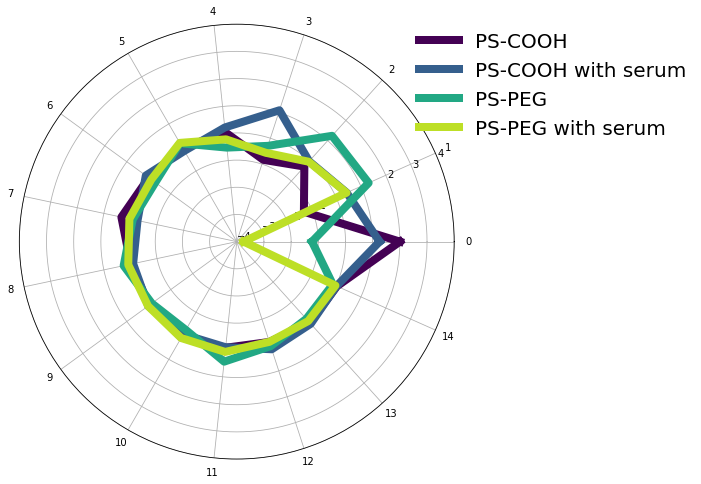

In [51]:
labels = ['PS-COOH', 'PS-COOH with serum', 'PS-PEG', 'PS-PEG with serum']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 4, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(prop={'size': 18}, loc= 'upper right')
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

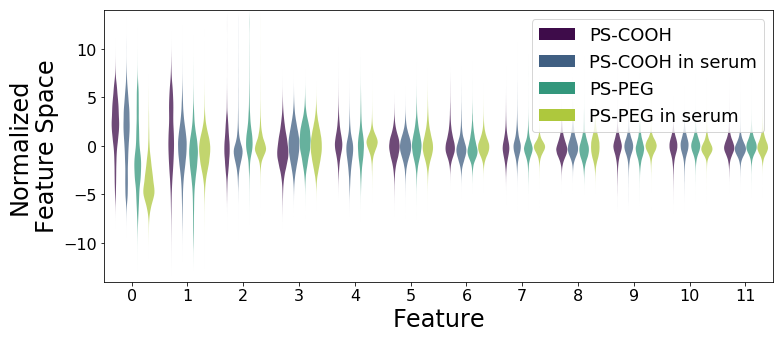

In [24]:
#labels2 = ['PS-COOH', 'PS-COOH in serum', 'PS-PEG', 'PS-PEG in serum']
#labels = ['PS', 'PS_cor', 'PEG', 'PEG_cor']
feats = feature_violin(pca_train.final, label='Type and Serum', lvals=labels, labels=labels2, fsubset=ncomp, yrange=[-14, 14],
                       legendfontsize=21, labelsize=24, fname='./pics/Fig4/tissue_pcadist.png')

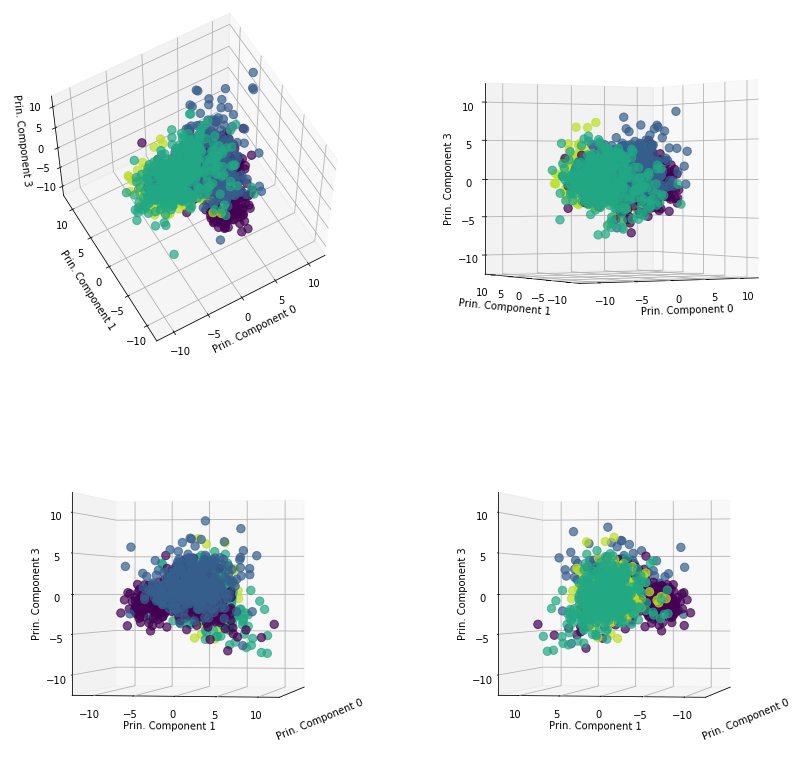

In [53]:
fstats1 = pca.feature_plot_3D(pca_train.final, label=featofvar, lvals=types, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], legendfontsize=24, labelfontsize=24, dpi=1600,
                              ticksize=20,
                              filename='./pics/Fig4/corona_3feats.png')

## Neural Network

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [26]:
# X_train = pca_train.final.values[:, -ncomp:]
# X_test = pca_test.final.values[:, -ncomp:]
# y_train = pca_train.final[featofvar].values
# y_test = pca_test.final[featofvar].values

X_train = pca_train.final[pca_train.final['Type'] == 'COOH'].values[:, -ncomp:]
X_test = pca_test.final[pca_test.final['Type'] == 'COOH'].values[:, -ncomp:]
y_train = pca_train[pca_train.final['Type'] == 'COOH'].final[featofvar].values
y_test = pca_test[pca_test.final['Type'] == 'COOH'].final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.81036691
Validation score: 0.673738
Iteration 2, loss = 0.77148514
Validation score: 0.689063
Iteration 3, loss = 0.75507900
Validation score: 0.689466
Iteration 4, loss = 0.74273729
Validation score: 0.695919
Iteration 5, loss = 0.73320226
Validation score: 0.698661
Iteration 6, loss = 0.72492886
Validation score: 0.701188
Iteration 7, loss = 0.71790548
Validation score: 0.706162
Iteration 8, loss = 0.71055175
Validation score: 0.712669
Iteration 9, loss = 0.70451788
Validation score: 0.710975
Iteration 10, loss = 0.69799054
Validation score: 0.716594
Iteration 11, loss = 0.69290046
Validation score: 0.720493
Iteration 12, loss = 0.68708107
Validation score: 0.720143
Iteration 13, loss = 0.68141711
Validation score: 0.724714
Iteration 14, loss = 0.67684217
Validation score: 0.727322
Iteration 15, loss = 0.67231055
Validation score: 0.719632
Iteration 16, loss = 0.66879872
Validation score: 0.737673
Iteration 17, loss = 0.66497444
Validation score: 0.733210
Iterat

In [28]:
# X_train = pca_train.final.values[:, -ncomp:]
# X_test = pca_test.final.values[:, -ncomp:]
# y_train = pca_train.final[featofvar].values
# y_test = pca_test.final[featofvar].values

X_train = pca_train.final[pca_train.final['Type'] == 'COOH'].values[:, -ncomp:]
X_test = pca_test.final[pca_test.final['Type'] == 'COOH'].values[:, -ncomp:]
y_train = pca_train.final[pca_train.final['Type'] == 'COOH'][featofvar].values
y_test = pca_test.final[pca_test.final['Type'] == 'COOH'][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.50559079
Validation score: 0.769296
Iteration 2, loss = 0.48452437
Validation score: 0.773994
Iteration 3, loss = 0.47366943
Validation score: 0.784361
Iteration 4, loss = 0.46467365
Validation score: 0.784604
Iteration 5, loss = 0.45578238
Validation score: 0.793108
Iteration 6, loss = 0.44815383
Validation score: 0.789585
Iteration 7, loss = 0.44111008
Validation score: 0.791123
Iteration 8, loss = 0.43531098
Validation score: 0.803879
Iteration 9, loss = 0.42926892
Validation score: 0.803394
Iteration 10, loss = 0.42444061
Validation score: 0.814935
Iteration 11, loss = 0.41839635
Validation score: 0.802138
Iteration 12, loss = 0.41373025
Validation score: 0.812384
Iteration 13, loss = 0.40825685
Validation score: 0.818417
Iteration 14, loss = 0.40361998
Validation score: 0.827164
Iteration 15, loss = 0.39897336
Validation score: 0.818701
Iteration 16, loss = 0.39499555
Validation score: 0.819673
Iteration 17, loss = 0.39012233
Validation score: 0.835871
Iterat

In [29]:
# X_train = pca_train.final.values[:, -ncomp:]
# X_test = pca_test.final.values[:, -ncomp:]
# y_train = pca_train.final[featofvar].values
# y_test = pca_test.final[featofvar].values

X_train = pca_train.final[pca_train.final['Type'] == 'PEG'].values[:, -ncomp:]
X_test = pca_test.final[pca_test.final['Type'] == 'PEG'].values[:, -ncomp:]
y_train = pca_train.final[pca_train.final['Type'] == 'PEG'][featofvar].values
y_test = pca_test.final[pca_test.final['Type'] == 'PEG'][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.41751222
Validation score: 0.841120
Iteration 2, loss = 0.39568817
Validation score: 0.844560
Iteration 3, loss = 0.38547416
Validation score: 0.848640
Iteration 4, loss = 0.37648359
Validation score: 0.852400
Iteration 5, loss = 0.36999654
Validation score: 0.856640
Iteration 6, loss = 0.36319719
Validation score: 0.854480
Iteration 7, loss = 0.35774738
Validation score: 0.857600
Iteration 8, loss = 0.35238403
Validation score: 0.857520
Iteration 9, loss = 0.34837636
Validation score: 0.862480
Iteration 10, loss = 0.34450858
Validation score: 0.865680
Iteration 11, loss = 0.34110458
Validation score: 0.864160
Iteration 12, loss = 0.33719849
Validation score: 0.867760
Iteration 13, loss = 0.33358057
Validation score: 0.869840
Iteration 14, loss = 0.33026611
Validation score: 0.870720
Iteration 15, loss = 0.32683856
Validation score: 0.875840
Iteration 16, loss = 0.32336244
Validation score: 0.869760
Iteration 17, loss = 0.32073252
Validation score: 0.872400
Iterat

## Extended Neural Network

In [30]:
pca_train.final['Pup and Slice'] = pca_train.final['Pup Number'].map(str) + pca_train.final['Slice Number']
pca_train.final = pca_train.final[['Pup and Slice'] + list(pca_train.final.columns[:-1])]

pca_test.final['Pup and Slice'] = pca_test.final['Pup Number'].map(str) + pca_test.final['Slice Number']
pca_test.final = pca_test.final[['Pup and Slice'] + list(pca_test.final.columns[:-1])]

In [40]:
ps_train = ['P1S2', 'P2S1', 'P2S2']
ps_test = 'P1S1'

X_train = pca_train.final[pca_train.final['Pup and Slice'].isin(ps_train)].values[:, -ncomp:] 
X_test = pca_test.final[pca_test.final['Pup and Slice']==ps_test].values[:, -ncomp:]
y_train = pca_train.final[pca_train.final['Pup and Slice'].isin(ps_train)][featofvar].values
y_test = pca_test.final[pca_test.final['Pup and Slice']==ps_test][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.71834996
Validation score: 0.714368
Iteration 2, loss = 0.68148947
Validation score: 0.719955
Iteration 3, loss = 0.66541336
Validation score: 0.731034
Iteration 4, loss = 0.65279966
Validation score: 0.734579
Iteration 5, loss = 0.64223827
Validation score: 0.729630
Iteration 6, loss = 0.63336034
Validation score: 0.738697
Iteration 7, loss = 0.62506174
Validation score: 0.739400
Iteration 8, loss = 0.61702168
Validation score: 0.752139
Iteration 9, loss = 0.60905675
Validation score: 0.751149
Iteration 10, loss = 0.60239721
Validation score: 0.756450
Iteration 11, loss = 0.59644382
Validation score: 0.756354
Iteration 12, loss = 0.59012812
Validation score: 0.748148
Iteration 13, loss = 0.58548947
Validation score: 0.764847
Iteration 14, loss = 0.57892080
Validation score: 0.769732
Iteration 15, loss = 0.57560068
Validation score: 0.777458
Iteration 16, loss = 0.57015103
Validation score: 0.780587
Iteration 17, loss = 0.56580093
Validation score: 0.780843
Iterat

In [41]:
# X_train = pca_train.final[pca_train.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])].values[:, -ncomp:] 
# X_test = pca_test.final[pca_test.final['Pup and Slice']=='P2S2'].values[:, -ncomp:]
# y_train = pca_train.final[pca_train.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])][featofvar].values
# y_test = pca_test.final[pca_test.final['Pup and Slice']=='P2S2'][featofvar].values

X_train = pca_train.final[(pca_train.final['Type'] == 'COOH') & (pca_train.final['Pup and Slice'].isin(ps_train))].values[:, -ncomp:] 
X_test = pca_test.final[(pca_train.final['Type'] == 'COOH') & (pca_test.final['Pup and Slice']==ps_test)].values[:, -ncomp:]
y_train = pca_train.final[(pca_train.final['Type'] == 'COOH') & (pca_train.final['Pup and Slice'].isin(ps_train))][featofvar].values
y_test = pca_test.final[(pca_train.final['Type'] == 'COOH')& (pca_test.final['Pup and Slice']==ps_test)][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.44144052
Validation score: 0.804685
Iteration 2, loss = 0.41927791
Validation score: 0.814046
Iteration 3, loss = 0.40861420
Validation score: 0.813673
Iteration 4, loss = 0.39881209
Validation score: 0.816001
Iteration 5, loss = 0.39045846
Validation score: 0.824291
Iteration 6, loss = 0.38271894
Validation score: 0.824896
Iteration 7, loss = 0.37532160
Validation score: 0.829041
Iteration 8, loss = 0.36880145
Validation score: 0.830857
Iteration 9, loss = 0.36313040
Validation score: 0.835933
Iteration 10, loss = 0.35611169
Validation score: 0.843478
Iteration 11, loss = 0.35099661
Validation score: 0.841568
Iteration 12, loss = 0.34564820
Validation score: 0.847343
Iteration 13, loss = 0.34035052
Validation score: 0.853956
Iteration 14, loss = 0.33431092
Validation score: 0.849206
Iteration 15, loss = 0.33003521
Validation score: 0.853258
Iteration 16, loss = 0.32465813
Validation score: 0.854375
Iteration 17, loss = 0.32032550
Validation score: 0.861314
Iterat

In [42]:
# X_train = pca_train.final[pca_train.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])].values[:, -ncomp:] 
# X_test = pca_test.final[pca_test.final['Pup and Slice']=='P2S2'].values[:, -ncomp:]
# y_train = pca_train.final[pca_train.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])][featofvar].values
# y_test = pca_test.final[pca_test.final['Pup and Slice']=='P2S2'][featofvar].values

X_train = pca_train.final[(pca_train.final['Type'] == 'PEG') & (pca_train.final['Pup and Slice'].isin(ps_train))].values[:, -ncomp:] 
X_test = pca_test.final[(pca_train.final['Type'] == 'PEG') & (pca_test.final['Pup and Slice']==ps_test)].values[:, -ncomp:]
y_train = pca_train.final[(pca_train.final['Type'] == 'PEG') & (pca_train.final['Pup and Slice'].isin(ps_train))][featofvar].values
y_test = pca_test.final[(pca_train.final['Type'] == 'PEG')& (pca_test.final['Pup and Slice']==ps_test)][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.34201476
Validation score: 0.866064
Iteration 2, loss = 0.32748834
Validation score: 0.869923
Iteration 3, loss = 0.32120837
Validation score: 0.876015
Iteration 4, loss = 0.31609881
Validation score: 0.875406
Iteration 5, loss = 0.31097829
Validation score: 0.876219
Iteration 6, loss = 0.30676229
Validation score: 0.878249
Iteration 7, loss = 0.30187689
Validation score: 0.880585
Iteration 8, loss = 0.29829059
Validation score: 0.879468
Iteration 9, loss = 0.29406526
Validation score: 0.880179
Iteration 10, loss = 0.29020082
Validation score: 0.883225
Iteration 11, loss = 0.28646694
Validation score: 0.886779
Iteration 12, loss = 0.28288062
Validation score: 0.879773
Iteration 13, loss = 0.27997169
Validation score: 0.891145
Iteration 14, loss = 0.27586012
Validation score: 0.888607
Iteration 15, loss = 0.27290673
Validation score: 0.887287
Iteration 16, loss = 0.26898409
Validation score: 0.892872
Iteration 17, loss = 0.26561577
Validation score: 0.890841
Iterat

/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [147]:
#test = pcadataset.final.values[:, -ncomp:]
#y = pcadataset.final[featofvar].values

X_train = pcadataset.final[pcadataset.final['Slice Number']=='S1'].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slice Number']=='S2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slice Number']=='S1'][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slice Number']=='S2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.44149860
Validation score: 0.846829
Iteration 2, loss = 0.38493469
Validation score: 0.854904
Iteration 3, loss = 0.36730121
Validation score: 0.859397
Iteration 4, loss = 0.35512375
Validation score: 0.863836
Iteration 5, loss = 0.34581901
Validation score: 0.869852
Iteration 6, loss = 0.33751402
Validation score: 0.872072
Iteration 7, loss = 0.33071801
Validation score: 0.873676
Iteration 8, loss = 0.32408840
Validation score: 0.879506
Iteration 9, loss = 0.31840422
Validation score: 0.876297
Iteration 10, loss = 0.31297011
Validation score: 0.883891
Iteration 11, loss = 0.30801383
Validation score: 0.885282
Iteration 12, loss = 0.30314379
Validation score: 0.885255
Iteration 13, loss = 0.29856917
Validation score: 0.890683
Iteration 14, loss = 0.29417120
Validation score: 0.890389
Iteration 15, loss = 0.28967261
Validation score: 0.893572
Iteration 16, loss = 0.28534438
Validation score: 0.890978
Iteration 17, loss = 0.28205961
Validation score: 0.895738
Iterat

Text(0,0.5,'Validation Scores')

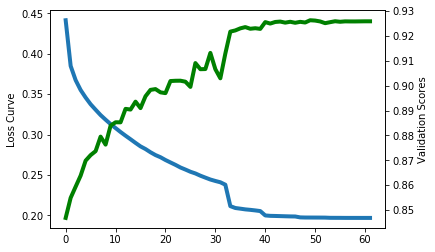

In [150]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 50])
#ax1.set_ylim([0.5, 0.8])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.7, 0.8])
ax2.set_ylabel('Validation Scores')

In [151]:
X_train = pcadataset.final[pcadataset.final['Pup Number']=='P1'].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup Number']=='P2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup Number']=='P1'][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup Number']=='P2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.57986556
Validation score: 0.800164
Iteration 2, loss = 0.50898815
Validation score: 0.810132
Iteration 3, loss = 0.48478379
Validation score: 0.815558
Iteration 4, loss = 0.46756560
Validation score: 0.824453
Iteration 5, loss = 0.45395128
Validation score: 0.828870
Iteration 6, loss = 0.44268684
Validation score: 0.828649
Iteration 7, loss = 0.43295115
Validation score: 0.830983
Iteration 8, loss = 0.42402849
Validation score: 0.836661
Iteration 9, loss = 0.41608738
Validation score: 0.838933
Iteration 10, loss = 0.40945506
Validation score: 0.842150
Iteration 11, loss = 0.40209598
Validation score: 0.840131
Iteration 12, loss = 0.39613837
Validation score: 0.848995
Iteration 13, loss = 0.39018413
Validation score: 0.851550
Iteration 14, loss = 0.38497403
Validation score: 0.849342
Iteration 15, loss = 0.37914596
Validation score: 0.859027
Iteration 16, loss = 0.37584208
Validation score: 0.854610
Iteration 17, loss = 0.37026673
Validation score: 0.859279
Iterat

In [8]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.51433668
Validation score: 0.818152
Iteration 2, loss = 0.46183297
Validation score: 0.826299
Iteration 3, loss = 0.44315788
Validation score: 0.832838
Iteration 4, loss = 0.43072930
Validation score: 0.835653
Iteration 5, loss = 0.42055685
Validation score: 0.840146
Iteration 6, loss = 0.41263245
Validation score: 0.841964
Iteration 7, loss = 0.40577594
Validation score: 0.841737
Iteration 8, loss = 0.39955889
Validation score: 0.848486
Iteration 9, loss = 0.39404894
Validation score: 0.842559
Iteration 10, loss = 0.38880976
Validation score: 0.847070
Iteration 11, loss = 0.38449593
Validation score: 0.852822
Iteration 12, loss = 0.37998170
Validation score: 0.855479
Iteration 13, loss = 0.37581984
Validation score: 0.849343
Iteration 14, loss = 0.37215860
Validation score: 0.859256
Iteration 15, loss = 0.36851619
Validation score: 0.859291
Iteration 16, loss = 0.36549643
Validation score: 0.858504
Iteration 17, loss = 0.36196874
Validation score: 0.857997
Iterat

In [162]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S1'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.73512640
Validation score: 0.712037
Iteration 2, loss = 0.66355753
Validation score: 0.723507
Iteration 3, loss = 0.64033881
Validation score: 0.732109
Iteration 4, loss = 0.62563518
Validation score: 0.736380
Iteration 5, loss = 0.61380214
Validation score: 0.742460
Iteration 6, loss = 0.60376794
Validation score: 0.748521
Iteration 7, loss = 0.59619589
Validation score: 0.749537
Iteration 8, loss = 0.58823527
Validation score: 0.752852
Iteration 9, loss = 0.58157846
Validation score: 0.755516
Iteration 10, loss = 0.57506509
Validation score: 0.763773
Iteration 11, loss = 0.56952201
Validation score: 0.760316
Iteration 12, loss = 0.56291467
Validation score: 0.762695
Iteration 13, loss = 0.55813627
Validation score: 0.772700
Iteration 14, loss = 0.55271695
Validation score: 0.774775
Iteration 15, loss = 0.54861711
Validation score: 0.770158
Iteration 16, loss = 0.54395809
Validation score: 0.769467
Iteration 17, loss = 0.54066349
Validation score: 0.770016
Valida

In [167]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2'])]['Type'].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P2S1']['Type'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.24099031
Validation score: 0.920281
Iteration 2, loss = 0.20193857
Validation score: 0.925264
Iteration 3, loss = 0.19354503
Validation score: 0.927704
Iteration 4, loss = 0.18814448
Validation score: 0.930206
Iteration 5, loss = 0.18394853
Validation score: 0.930572
Iteration 6, loss = 0.18045065
Validation score: 0.932829
Iteration 7, loss = 0.17727940
Validation score: 0.933622
Iteration 8, loss = 0.17428833
Validation score: 0.931426
Iteration 9, loss = 0.17168921
Validation score: 0.935351
Iteration 10, loss = 0.16909569
Validation score: 0.936266
Iteration 11, loss = 0.16690356
Validation score: 0.936001
Iteration 12, loss = 0.16466154
Validation score: 0.937628
Iteration 13, loss = 0.16275982
Validation score: 0.938991
Iteration 14, loss = 0.16087516
Validation score: 0.938381
Iteration 15, loss = 0.15908183
Validation score: 0.937649
Iteration 16, loss = 0.15726617
Validation score: 0.939804
Iteration 17, loss = 0.15565424
Validation score: 0.936551
Iterat

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 50])
#ax1.set_ylim([0.5, 0.8])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.7, 0.8])
ax2.set_ylabel('Validation Scores')

In [163]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P1S1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P1S1'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.55920808
Validation score: 0.799178
Iteration 2, loss = 0.50683775
Validation score: 0.806347
Iteration 3, loss = 0.48845147
Validation score: 0.812147
Iteration 4, loss = 0.47595706
Validation score: 0.816273
Iteration 5, loss = 0.46608505
Validation score: 0.817691
Iteration 6, loss = 0.45712412
Validation score: 0.822709
Iteration 7, loss = 0.45015427
Validation score: 0.826565
Iteration 8, loss = 0.44309890
Validation score: 0.827935
Iteration 9, loss = 0.43707526
Validation score: 0.833017
Iteration 10, loss = 0.43172541
Validation score: 0.829082
Iteration 11, loss = 0.42695115
Validation score: 0.833097
Iteration 12, loss = 0.42246889
Validation score: 0.837112
Iteration 13, loss = 0.41791946
Validation score: 0.832985
Iteration 14, loss = 0.41455354
Validation score: 0.840537
Iteration 15, loss = 0.41138731
Validation score: 0.833639
Iteration 16, loss = 0.40805041
Validation score: 0.840330
Iteration 17, loss = 0.40523067
Validation score: 0.846289
Iterat

Text(0,0.5,'Validation Scores')

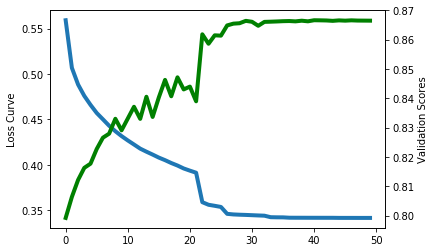

In [164]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 50])
#ax1.set_ylim([0.5, 0.8])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.7, 0.8])
ax2.set_ylabel('Validation Scores')

In [165]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S1', 'P2S2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P1S2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S1', 'P2S2'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='P1S2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.60092491
Validation score: 0.779744
Iteration 2, loss = 0.54311390
Validation score: 0.789258
Iteration 3, loss = 0.52491169
Validation score: 0.790661
Iteration 4, loss = 0.51340327
Validation score: 0.799683
Iteration 5, loss = 0.50383130
Validation score: 0.797514
Iteration 6, loss = 0.49582724
Validation score: 0.803164
Iteration 7, loss = 0.48802526
Validation score: 0.801177
Iteration 8, loss = 0.48198986
Validation score: 0.799847
Iteration 9, loss = 0.47591064
Validation score: 0.809634
Iteration 10, loss = 0.47016891
Validation score: 0.799282
Iteration 11, loss = 0.46518849
Validation score: 0.796894
Iteration 12, loss = 0.45937814
Validation score: 0.811074
Iteration 13, loss = 0.45545757
Validation score: 0.819385
Iteration 14, loss = 0.45071053
Validation score: 0.796311
Iteration 15, loss = 0.44602521
Validation score: 0.798024
Iteration 16, loss = 0.44234085
Validation score: 0.822027
Iteration 17, loss = 0.43806778
Validation score: 0.816542
Iterat

Text(0,0.5,'Validation Scores')

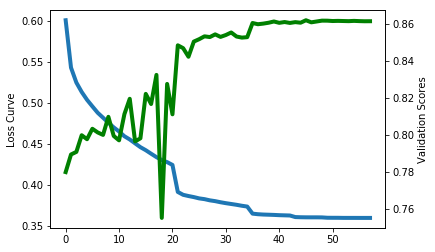

In [166]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 50])
#ax1.set_ylim([0.5, 0.8])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.7, 0.8])
ax2.set_ylabel('Validation Scores')

In [9]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P2S1')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P2S1')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.51481076
Validation score: 0.755086
Iteration 2, loss = 0.49318111
Validation score: 0.765258
Iteration 3, loss = 0.48284002
Validation score: 0.763284
Iteration 4, loss = 0.47431133
Validation score: 0.773820
Iteration 5, loss = 0.46635337
Validation score: 0.776523
Iteration 6, loss = 0.45893795
Validation score: 0.779104
Iteration 7, loss = 0.45184525
Validation score: 0.784508
Iteration 8, loss = 0.44521828
Validation score: 0.786573
Iteration 9, loss = 0.43858640
Validation score: 0.788547
Iteration 10, loss = 0.43254124
Validation score: 0.789184
Iteration 11, loss = 0.42684989
Validation score: 0.793344
Iteration 12, loss = 0.42079659
Validation score: 0.802848
Iteration 13, loss = 0.41499891
Validation score: 0.803607
Iteration 14, loss = 0.41004286
Validation score: 0.802514
Iteration 15, loss = 0.40447819
Validation score: 0.786087
Iteration 16, loss = 0.39938724
Validation score: 0.810227
Iteration 17, loss = 0.39440055
Validation score: 0.813688
Iterat

In [10]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P1S1')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P1S1')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.36282777
Validation score: 0.849137
Iteration 2, loss = 0.34281487
Validation score: 0.855544
Iteration 3, loss = 0.33192262
Validation score: 0.859290
Iteration 4, loss = 0.32320901
Validation score: 0.862089
Iteration 5, loss = 0.31600029
Validation score: 0.865489
Iteration 6, loss = 0.30960112
Validation score: 0.864402
Iteration 7, loss = 0.30405076
Validation score: 0.868611
Iteration 8, loss = 0.29837513
Validation score: 0.873237
Iteration 9, loss = 0.29374363
Validation score: 0.874786
Iteration 10, loss = 0.28884171
Validation score: 0.873329
Iteration 11, loss = 0.28447301
Validation score: 0.879550
Iteration 12, loss = 0.28009448
Validation score: 0.881100
Iteration 13, loss = 0.27594071
Validation score: 0.882441
Iteration 14, loss = 0.27254408
Validation score: 0.884384
Iteration 15, loss = 0.26859456
Validation score: 0.886697
Iteration 16, loss = 0.26483729
Validation score: 0.890652
Iteration 17, loss = 0.26107462
Validation score: 0.893011
Iterat

In [11]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P1S2')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P1S2')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.44728537
Validation score: 0.808773
Iteration 2, loss = 0.41864370
Validation score: 0.816836
Iteration 3, loss = 0.40512175
Validation score: 0.823222
Iteration 4, loss = 0.39424882
Validation score: 0.825739
Iteration 5, loss = 0.38567682
Validation score: 0.830393
Iteration 6, loss = 0.37811236
Validation score: 0.832476
Iteration 7, loss = 0.37177681
Validation score: 0.835345
Iteration 8, loss = 0.36503797
Validation score: 0.838646
Iteration 9, loss = 0.35945442
Validation score: 0.837997
Iteration 10, loss = 0.35321972
Validation score: 0.845330
Iteration 11, loss = 0.34782659
Validation score: 0.844951
Iteration 12, loss = 0.34270914
Validation score: 0.849605
Iteration 13, loss = 0.33764496
Validation score: 0.852609
Iteration 14, loss = 0.33306455
Validation score: 0.856126
Iteration 15, loss = 0.32843643
Validation score: 0.856965
Iteration 16, loss = 0.32433503
Validation score: 0.858670
Iteration 17, loss = 0.32044290
Validation score: 0.860212
Iterat

In [12]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P2S2')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S1']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final['Pup and Slice']=='P2S2')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.29663234
Validation score: 0.879255
Iteration 2, loss = 0.27720582
Validation score: 0.884050
Iteration 3, loss = 0.27009910
Validation score: 0.886085
Iteration 4, loss = 0.26411154
Validation score: 0.887981
Iteration 5, loss = 0.25874904
Validation score: 0.892581
Iteration 6, loss = 0.25370873
Validation score: 0.891856
Iteration 7, loss = 0.24888822
Validation score: 0.894672
Iteration 8, loss = 0.24439112
Validation score: 0.897627
Iteration 9, loss = 0.23996330
Validation score: 0.898018
Iteration 10, loss = 0.23608825
Validation score: 0.899969
Iteration 11, loss = 0.23221427
Validation score: 0.901391
Iteration 12, loss = 0.22826198
Validation score: 0.902897
Iteration 13, loss = 0.22439842
Validation score: 0.905489
Iteration 14, loss = 0.22081556
Validation score: 0.905406
Iteration 15, loss = 0.21750169
Validation score: 0.901837
Iteration 16, loss = 0.21382670
Validation score: 0.911790
Iteration 17, loss = 0.21007500
Validation score: 0.910982
Iterat

In [13]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P2S1')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P1S2', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P2S1')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.47510721
Validation score: 0.805468
Iteration 2, loss = 0.43393572
Validation score: 0.813535
Iteration 3, loss = 0.41420794
Validation score: 0.822033
Iteration 4, loss = 0.39969128
Validation score: 0.824066
Iteration 5, loss = 0.38845190
Validation score: 0.831578
Iteration 6, loss = 0.37895816
Validation score: 0.830100
Iteration 7, loss = 0.37196689
Validation score: 0.836012
Iteration 8, loss = 0.36543090
Validation score: 0.838783
Iteration 9, loss = 0.35977635
Validation score: 0.839276
Iteration 10, loss = 0.35432452
Validation score: 0.841185
Iteration 11, loss = 0.34986501
Validation score: 0.845495
Iteration 12, loss = 0.34634430
Validation score: 0.840692
Iteration 13, loss = 0.34226538
Validation score: 0.850114
Iteration 14, loss = 0.33772381
Validation score: 0.849190
Iteration 15, loss = 0.33489984
Validation score: 0.847774
Iteration 16, loss = 0.33115199
Validation score: 0.850052
Validation score did not improve more than tol=0.000010 for two c

In [14]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P1S1')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P2S1', 'P1S2', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P1S1')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.32441381
Validation score: 0.873880
Iteration 2, loss = 0.30506827
Validation score: 0.878540
Iteration 3, loss = 0.29447012
Validation score: 0.881561
Iteration 4, loss = 0.28454774
Validation score: 0.885760
Iteration 5, loss = 0.27569670
Validation score: 0.886067
Iteration 6, loss = 0.26811737
Validation score: 0.887654
Iteration 7, loss = 0.26185603
Validation score: 0.891034
Iteration 8, loss = 0.25696238
Validation score: 0.892160
Iteration 9, loss = 0.25236002
Validation score: 0.893850
Iteration 10, loss = 0.24861860
Validation score: 0.893184
Iteration 11, loss = 0.24478981
Validation score: 0.896513
Iteration 12, loss = 0.24161862
Validation score: 0.895950
Iteration 13, loss = 0.23853994
Validation score: 0.896410
Iteration 14, loss = 0.23534033
Validation score: 0.898203
Iteration 15, loss = 0.23281536
Validation score: 0.901633
Iteration 16, loss = 0.22996234
Validation score: 0.900814
Iteration 17, loss = 0.22753205
Validation score: 0.901070
Iterat

In [15]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P2S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P1S2')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P2S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P1S2')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.34506354
Validation score: 0.878524
Iteration 2, loss = 0.31593794
Validation score: 0.880645
Iteration 3, loss = 0.30340244
Validation score: 0.885390
Iteration 4, loss = 0.29584677
Validation score: 0.887400
Iteration 5, loss = 0.29070428
Validation score: 0.888628
Iteration 6, loss = 0.28673269
Validation score: 0.888014
Iteration 7, loss = 0.28327836
Validation score: 0.888070
Iteration 8, loss = 0.28007793
Validation score: 0.889131
Iteration 9, loss = 0.27686729
Validation score: 0.890694
Iteration 10, loss = 0.27391971
Validation score: 0.893541
Iteration 11, loss = 0.27131606
Validation score: 0.891755
Iteration 12, loss = 0.26912765
Validation score: 0.889354
Iteration 13, loss = 0.26687363
Validation score: 0.896611
Iteration 14, loss = 0.26452600
Validation score: 0.893541
Iteration 15, loss = 0.26220200
Validation score: 0.894323
Iteration 16, loss = 0.26023284
Validation score: 0.887233
Validation score did not improve more than tol=0.000010 for two c

In [16]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P1S2']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P2S2')].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['P1S1', 'P2S1', 'P1S2']))]['Serum'].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final['Pup and Slice']=='P2S2')]['Serum'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.31584266
Validation score: 0.880626
Iteration 2, loss = 0.28092064
Validation score: 0.886018
Iteration 3, loss = 0.26895515
Validation score: 0.889722
Iteration 4, loss = 0.26026345
Validation score: 0.894880
Iteration 5, loss = 0.25332271
Validation score: 0.897412
Iteration 6, loss = 0.24752359
Validation score: 0.898490
Iteration 7, loss = 0.24237942
Validation score: 0.899944
Iteration 8, loss = 0.23843434
Validation score: 0.901772
Iteration 9, loss = 0.23516574
Validation score: 0.901538
Iteration 10, loss = 0.23162661
Validation score: 0.902804
Iteration 11, loss = 0.22846480
Validation score: 0.898772
Iteration 12, loss = 0.22615534
Validation score: 0.903788
Iteration 13, loss = 0.22350662
Validation score: 0.907539
Iteration 14, loss = 0.22094498
Validation score: 0.900178
Iteration 15, loss = 0.21877875
Validation score: 0.906086
Iteration 16, loss = 0.21646527
Validation score: 0.908477
Iteration 17, loss = 0.21423810
Validation score: 0.908758
Iterat

## Alternate Binning

In [7]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [8]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.68584267
Validation score: 0.737654
Iteration 2, loss = 0.63020024
Validation score: 0.756788
Iteration 3, loss = 0.60867270
Validation score: 0.764413
Iteration 4, loss = 0.59165559
Validation score: 0.762933
Iteration 5, loss = 0.57859928
Validation score: 0.771061
Iteration 6, loss = 0.56770208
Validation score: 0.781564
Iteration 7, loss = 0.55805681
Validation score: 0.790168
Iteration 8, loss = 0.54871318
Validation score: 0.793575
Iteration 9, loss = 0.54015493
Validation score: 0.793966
Iteration 10, loss = 0.53314865
Validation score: 0.767263
Iteration 11, loss = 0.52614275
Validation score: 0.800838
Iteration 12, loss = 0.51878538
Validation score: 0.797430
Iteration 13, loss = 0.51375107
Validation score: 0.810615
Iteration 14, loss = 0.50790191
Validation score: 0.808268
Iteration 15, loss = 0.50322592
Validation score: 0.812570
Iteration 16, loss = 0.49887128
Validation score: 0.808352
Iteration 17, loss = 0.49523755
Validation score: 0.811592
Iterat

In [9]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final.bins.isin(checkerboard(8)))].values[:, -ncomp:]
X_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (~pcadataset.final.bins.isin(checkerboard(8)))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (pcadataset.final.bins.isin(checkerboard(8)))][featofvar].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'PEG') & (~pcadataset.final.bins.isin(checkerboard(8)))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.42848372
Validation score: 0.826060
Iteration 2, loss = 0.38714703
Validation score: 0.837962
Iteration 3, loss = 0.36895541
Validation score: 0.839487
Iteration 4, loss = 0.35627070
Validation score: 0.852991
Iteration 5, loss = 0.34529764
Validation score: 0.857110
Iteration 6, loss = 0.33713405
Validation score: 0.860238
Iteration 7, loss = 0.32970176
Validation score: 0.863137
Iteration 8, loss = 0.32425771
Validation score: 0.863671
Iteration 9, loss = 0.31799572
Validation score: 0.867562
Iteration 10, loss = 0.31329291
Validation score: 0.869850
Iteration 11, loss = 0.30857230
Validation score: 0.873360
Iteration 12, loss = 0.30421505
Validation score: 0.877861
Iteration 13, loss = 0.29988756
Validation score: 0.879387
Iteration 14, loss = 0.29504805
Validation score: 0.872521
Iteration 15, loss = 0.29232231
Validation score: 0.879539
Iteration 16, loss = 0.28785668
Validation score: 0.884422
Iteration 17, loss = 0.28362830
Validation score: 0.883811
Iterat

In [11]:
X_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final.bins.isin(checkerboard(8)))].values[:, -ncomp:]
X_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (~pcadataset.final.bins.isin(checkerboard(8)))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (pcadataset.final.bins.isin(checkerboard(8)))][featofvar].values
y_test = pcadataset.final[(pcadataset.final['Type'] == 'COOH') & (~pcadataset.final.bins.isin(checkerboard(8)))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.47361266
Validation score: 0.789265
Iteration 2, loss = 0.44801458
Validation score: 0.795743
Iteration 3, loss = 0.43171624
Validation score: 0.806011
Iteration 4, loss = 0.41794672
Validation score: 0.815574
Iteration 5, loss = 0.40662374
Validation score: 0.821611
Iteration 6, loss = 0.39540740
Validation score: 0.824872
Iteration 7, loss = 0.38611381
Validation score: 0.830557
Iteration 8, loss = 0.37679804
Validation score: 0.829676
Iteration 9, loss = 0.36852474
Validation score: 0.831174
Iteration 10, loss = 0.36136508
Validation score: 0.826150
Iteration 11, loss = 0.35348313
Validation score: 0.848096
Iteration 12, loss = 0.34623487
Validation score: 0.845011
Iteration 13, loss = 0.33929601
Validation score: 0.858717
Iteration 14, loss = 0.33351662
Validation score: 0.855896
Iteration 15, loss = 0.32845815
Validation score: 0.858717
Iteration 16, loss = 0.32196846
Validation score: 0.850212
Validation score did not improve more than tol=0.000010 for two c

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['COOH', 'PEG']

for i in range(0, 5):
    KNNmod, X, y = pca.build_model(pcadataset.final, featofvar, labels, equal_sampling=True,
                                       tsize=2000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final[featofvar].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
ypred = pd.Series(KNNmod.predict(X2)).str.split('_', expand=True)

In [ ]:
ya = np.copy(yact[0].values)
ya[ya == 'COOH'] = 1
ya[ya != 1] = 0

yp = np.copy(ypred[0].values)
yp[yp == 'COOH'] = 1
yp[yp != 1] = 0

In [ ]:
from sklearn import metrics

def mod_roc_curve(y_true, y_score, pos_label):
    ya = np.copy(y_true)
    ya[ya == pos_label] = 1
    ya[ya != 1] = 0

    yp = np.copy(y_score)
    yp[yp == pos_label] = 1
    yp[yp != 1] = 0
    
    fpr, tpr, thresholds = metrics.roc_curve(ya, yp, drop_intermediate=False)
    return fpr, tpr, thresholds

In [ ]:
fpr, tpr, thresholds = mod_roc_curve(yact[1].values, ypred[1].values, pos_label=None)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
yr1 = np.random.randint(0, 2, size=400)
yr2 = np.random.rand(400)
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 10
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 2.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 1.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
KNNmod.score(X2, y2)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics

In [ ]:
ynew = label_binarize(y, classes=labels)
y2new = label_binarize(y2, classes=labels)
n_classes = ynew.shape[1]

In [ ]:
ynew

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

In [ ]:
y_score = classifier.fit(X, ynew).decision_function(X2)

In [ ]:
y_scorep = pd.DataFrame(data=y_score.transpose()).idxmax()
y2newp = pd.DataFrame(data=y2new.transpose()).idxmax()

In [ ]:
ycorrect = y_scorep == y2newp

In [ ]:
ycorrect.mean()

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y2new[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y2new.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
tclass = 0
plt.figure()
lw = 4
plt.plot(fpr[tclass], tpr[tclass], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[tclass])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
classifier.score(X2, y2new)

In [ ]:
roc_auc[0]*roc_auc[1]*roc_auc[2]*roc_auc[3]

In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'slategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 0.4])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

I found a standard way of implementing ROC curves with non-binary data called the one versus all method. It essentially breaks a n-class system into n-1 binary systems, and you make an n-1 roc curves for each case. I can't use MLP methods this way, but it looks like I can get high predictive power as-is? Kind of? I can get 

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y, y_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
y

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])